In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
import plotly_express as px
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import fake_br_corpus

In [4]:
dataset = fake_br_corpus.load()

In [ ]:
display(
    px.pie(dataset, names='label'),
    px.pie(dataset, names='category'),
    px.histogram(dataset, x='category', color='label', barmode='group', ),
)

In [ ]:
fig = px.histogram(dataset, x='category', color='label', barmode='group')
fig.update_layout(
    font=dict(
        # family="Courier New, monospace",
        size=22,
        # color="RebeccaPurple"
    )
    # legend=dict(
    #     # x=0,
    #     # y=1,
    #     # traceorder="reversed",
    #     # title_font_family="Times New Roman",
    #     title_font_size=19,
    #     font=dict(
    #         # family="Courier",
    #         size=17,
    #         # color="black"
    #     ),
    # ),    
)

fig.show()

In [6]:
dataset['numWords'] = dataset.text.apply(lambda text: len(text.split(' ')))

In [7]:
from utils import evaluation
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

<AxesSubplot:xlabel='Number of words', ylabel='Count'>

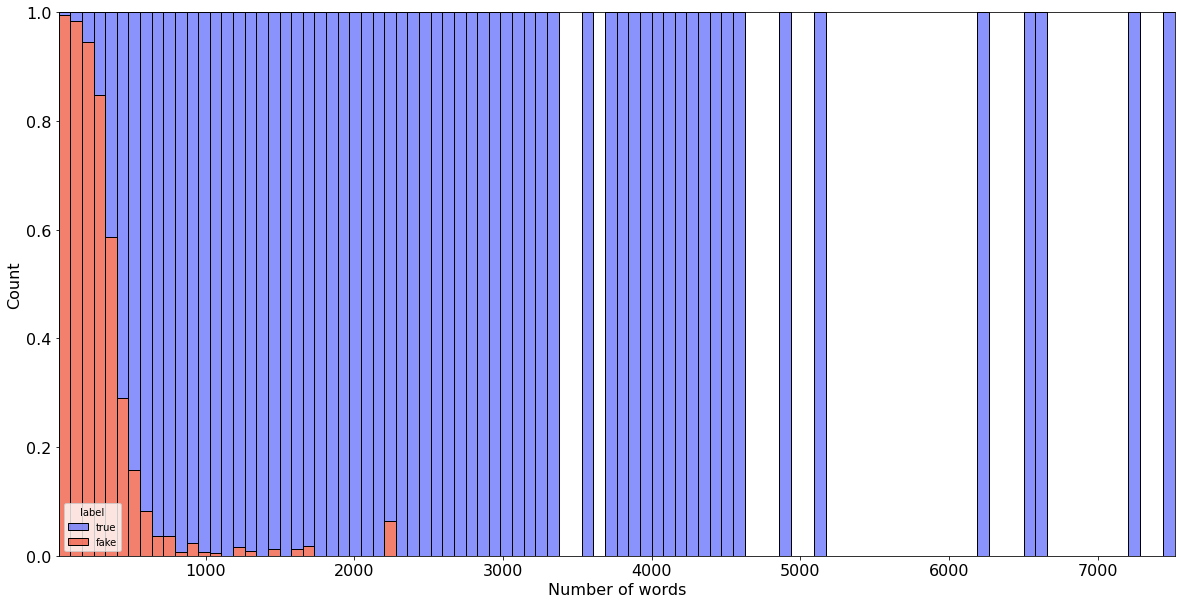

In [ ]:
fig = evaluation.sizeDistributionByLabel(
    dataset.label,
    dataset.numWords,
    palette=dict(
        fake='#ef553b',
        true='#636efa',
      ),
  )
fig.set_xlabel('Number of words', fontsize=16)
fig.set_ylabel('Count', fontsize=16)
fig.tick_params(labelsize=16)
fig

<AxesSubplot:xlabel='Number of words', ylabel='Count'>

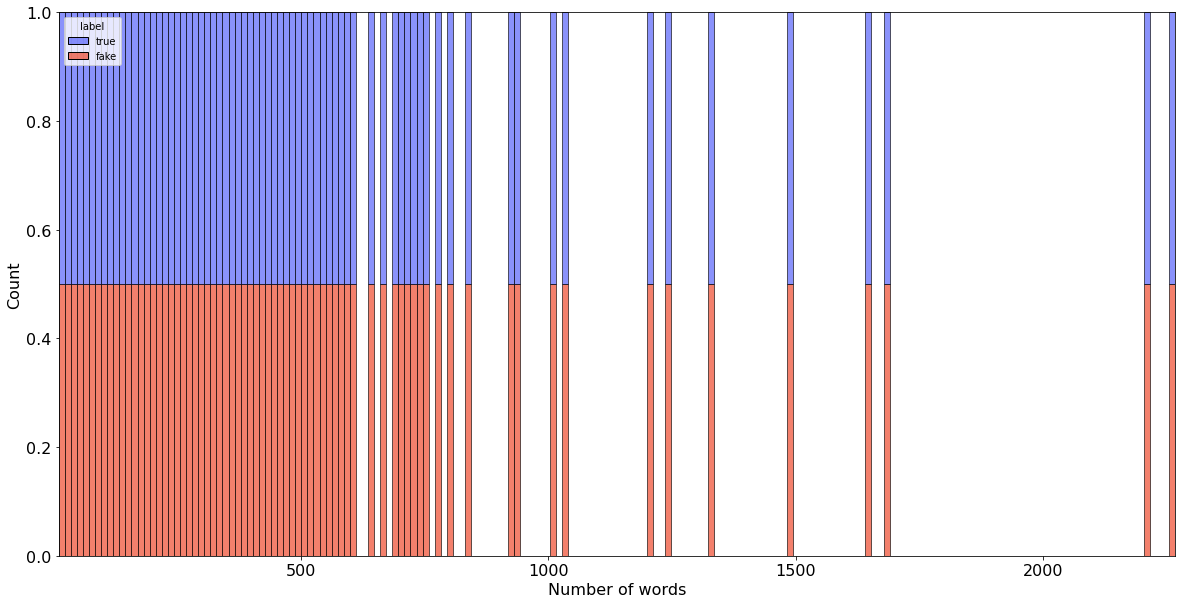

In [8]:
balancedTrain = fake_br_corpus.loadTrain(True).sort_values(by='label', ascending=False)
fig = evaluation.sizeDistributionByLabel(
    balancedTrain.label,
    balancedTrain.numWords,
    palette=dict(
        fake='#ef553b',
        true='#636efa',
      ),
  )
fig.set_xlabel('Number of words', fontsize=16)
fig.set_ylabel('Count', fontsize=16)
fig.tick_params(labelsize=16)
fig